In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
# Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust this path if your notebook is in a different folder
csv_path = '/Users/ashz/Desktop/STA304/STA304-Project/wardParkingData/Parking_Tags_Data_2024_with_wards.csv'
df = pd.read_csv(csv_path)
print('Rows loaded:', len(df))
df.head()

/var/folders/t8/582vs1ss411dmw449198qfbw0000gn/T/ipykernel_75287/3226629803.py:9: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Rows loaded: 1849768


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,city,AREA_L_CD,AREA_NAME
0,***20590,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,0.0,AT,2350 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park
1,***20591,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,1.0,AT,2350 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park
2,***31262,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,352.0,AT,5229 DUNDAS ST W,NaN,NaN,ON,Toronto,3,Etobicoke-Lakeshore
3,***18262,2024-10-01,403,STOP-SIGNED HIGHWAY-RUSH HOUR,190,719.0,NR,1395 DUNDAS ST W,NaN,NaN,ON,Toronto,9,Davenport
4,***89331,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,725.0,NaN,3446 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park


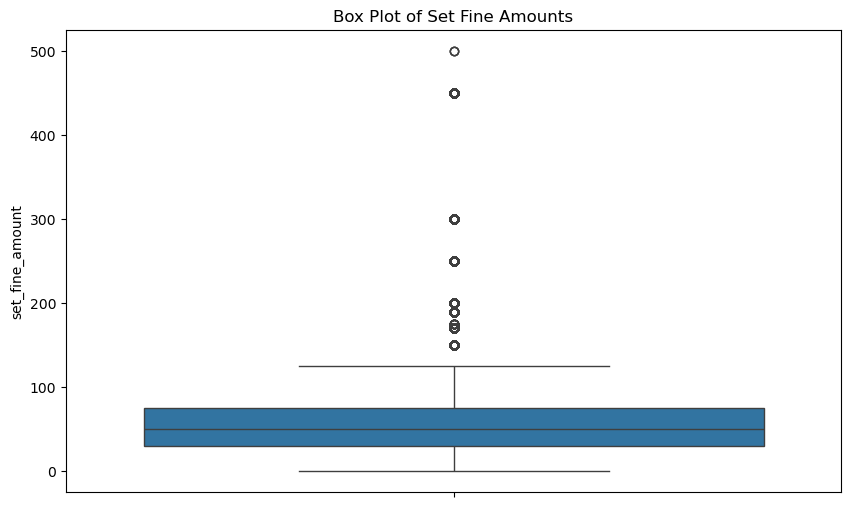

In [6]:
# Create box plot function
def create_box_plot(data,x_col, y_col, title, output_path):
    plt.figure(figsize=(10, 6))
    if x_col is None:
        sns.boxplot(y=y_col, data=data)
    else:
        sns.boxplot(x=x_col, y=y_col, data=data)
        
    plt.title(title)
    plt.savefig(output_path)
    plt.show()
    plt.close()

# box plot for set_fine_amount
create_box_plot(df, None, "set_fine_amount", "Box Plot of Set Fine Amounts", "figures_graphics/set_fine_amount_boxplot.png")


## How to open & run this notebook

- In VS Code: open the repository folder and click the file to open the notebook editor.
- Jupyter Lab / Notebook: install `jupyterlab` or `notebook`, then run:

```bash
python3 -m pip install jupyterlab pandas matplotlib seaborn
python3 -m jupyter lab
```

Notes: Adjust `csv_path` if your CSV is stored elsewhere. If plots show many missing values for `hour`, inspect `time_of_infraction` formats first.